<a href="https://colab.research.google.com/github/namans-git/res-paper-du/blob/main/time%26difficulty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Class.xlsx to Class (1).xlsx


In [4]:
df = pd.read_excel('Class.xlsx')

In [5]:
df = df.drop(df.index[[690, 691, 692, 693, 694, 695, 696]])#dropping points with one or more null variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Username/ID             690 non-null    object
 1   Question                690 non-null    object
 2   Question Difficulty     690 non-null    object
 3   Chosen Option           690 non-null    object
 4   Answer Submission Time  690 non-null    object
 5   Answer Attempts         690 non-null    int64 
 6   Time Spent (secs)       690 non-null    int64 
 7   Score Earned            690 non-null    int64 
 8   State                   690 non-null    object
dtypes: int64(3), object(6)
memory usage: 48.6+ KB


In [6]:
df.head()

,Username/ID,Question,Question Difficulty,Chosen Option,Answer Submission Time,Answer Attempts,Time Spent (secs),Score Earned,State
0,MUHAMMED FAIES,Q1,low,option_3,2021-12-29 11:10:09,1,35,1,"[[""option_3"", ""29-12-2021 11:10:09""]]"
1,MUHAMMED FAIES,Q2,low,option_2,2021-12-29 11:10:21,1,12,1,"[[""option_2"", ""29-12-2021 11:10:21""]]"
2,MUHAMMED FAIES,Q3,low,option_1,2021-12-29 11:10:40,1,19,1,"[[""option_1"", ""29-12-2021 11:10:40""]]"
3,MUHAMMED FAIES,Q4,low,option_3,2021-12-29 11:10:48,1,7,1,"[[""option_3"", ""29-12-2021 11:10:48""]]"
4,MUHAMMED FAIES,Q5,low,option_4,2021-12-29 11:11:01,1,13,1,"[[""option_4"", ""29-12-2021 11:11:01""]]"


##### creating a new df

In [7]:
#creating a new df
data = [df['Username/ID'], df['Question'], df['Question Difficulty'], df['Time Spent (secs)']]
headers = ['Username/ID','Question', 'Question Difficulty', 'time_spent(secs)']

new_df = pd.concat(data, axis=1, keys=headers)

In [ ]:
#changing str to discrete values, there prob is a cleaner way to do this
new_df['Question'][new_df['Question'] == 'Q1'] = 1
new_df['Question'][new_df['Question'] == 'Q2'] = 2
new_df['Question'][new_df['Question'] == 'Q3'] = 3
new_df['Question'][new_df['Question'] == 'Q4'] = 4
new_df['Question'][new_df['Question'] == 'Q5'] = 5
new_df['Question'][new_df['Question'] == 'Q6'] = 6
new_df['Question'][new_df['Question'] == 'Q7'] = 7
new_df['Question'][new_df['Question'] == 'Q8'] = 8
new_df['Question'][new_df['Question'] == 'Q9'] = 9
new_df['Question'][new_df['Question'] == 'Q10'] = 10
new_df['Question'][new_df['Question'] == 'Q11'] = 11
new_df['Question'][new_df['Question'] == 'Q12'] = 12
new_df['Question'][new_df['Question'] == 'Q13'] = 13
new_df['Question'][new_df['Question'] == 'Q14'] = 14
new_df['Question'][new_df['Question'] == 'Q15'] = 15
### clear output

In [9]:
new_df['Question'] = new_df['Question'].astype(int) # str to int

In [10]:
new_df.head(2)

,Username/ID,Question,Question Difficulty,time_spent(secs)
0,MUHAMMED FAIES,1,low,35
1,MUHAMMED FAIES,2,low,12


##### some eda, categorical plots

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


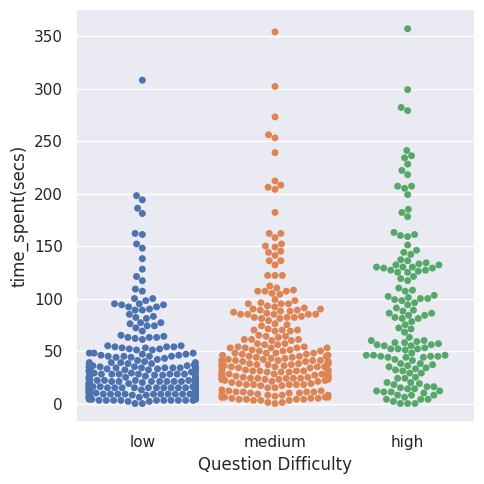

In [11]:
sns.set_theme()
sns.catplot(data=new_df, x="Question Difficulty", y="time_spent(secs)", kind="swarm", hue = 'Question Difficulty')

<Axes: xlabel='Question', ylabel='time_spent(secs)'>

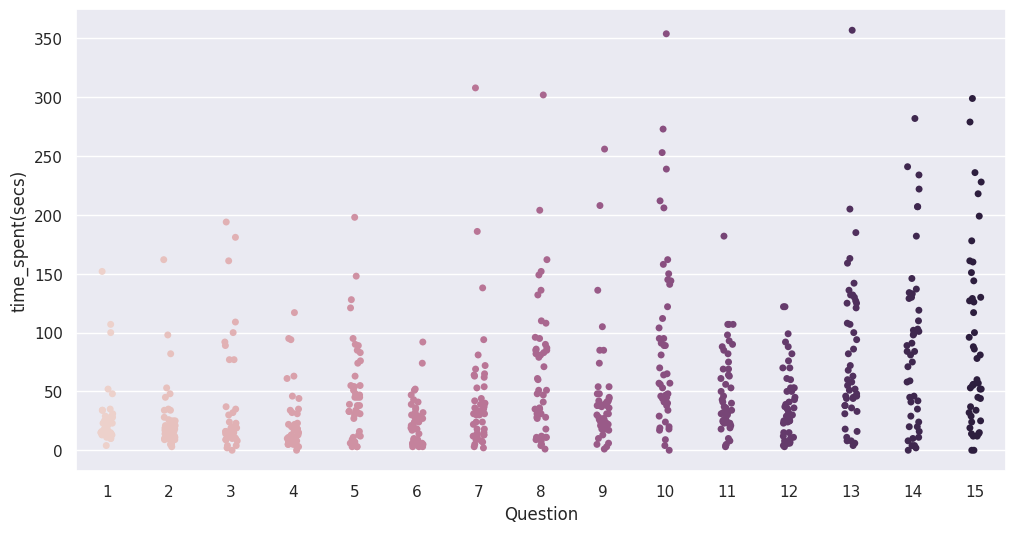

In [12]:
sns.set(rc = {'figure.figsize':(12, 6)})
sns.stripplot(x="Question", y="time_spent(secs)",data=new_df, hue = 'Question',legend=False)

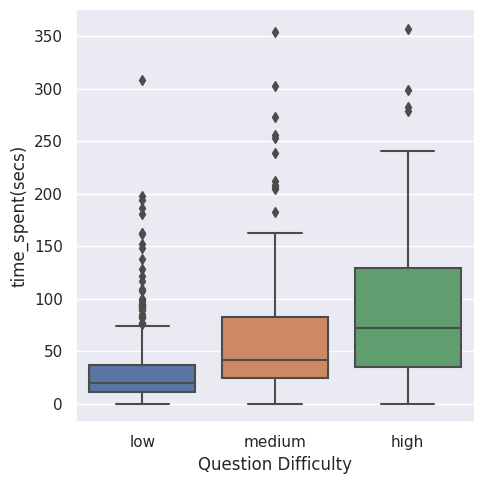

In [13]:
sns.catplot(x="Question Difficulty", y="time_spent(secs)", kind="box", data=new_df)

###### The plot above shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently.

the average response time for each question

In [14]:
unq_names = df['Username/ID'].unique()
unq_names = unq_names.tolist()
len(unq_names)#creating a list of student names

46

In [15]:
lst_avrg = []
for num in range(1,16):
  lst_avrg.append(new_df.loc[new_df['Question'] == num]['time_spent(secs)'].mean())

lst_avrg_ = lst_avrg * 46 # 46 students

column_values = pd.Series(lst_avrg_)#list to pandas series, not imp to convert it but to insert it to a specific location we need a series object
new_df.insert(loc=4, column='class_average_time', value=column_values)

In [16]:
new_df['difference'] = new_df['time_spent(secs)'] - new_df['class_average_time']

In [27]:
new_df.sort_values('time_spent(secs)', ascending=True)[:20]#20 attempts with the lowest response times, compared with the class average(for corresponding question). we can also sort it using time difference.

,Username/ID,Question,Question Difficulty,time_spent(secs),class_average_time,difference
312,BHAWNA NA,3,low,0,82.934783,-82.934783
524,DIVYA GOEL,10,medium,0,91.478261,-91.478261
313,BHAWNA NA,4,low,0,90.543478,-90.543478
239,ANJALI NA,15,high,0,91.478261,-91.478261
103,SIMRAN NA,14,high,0,90.543478,-90.543478
104,SIMRAN NA,15,high,0,91.478261,-91.478261
158,MANPREET SINGH,9,medium,1,45.652174,-44.652174
157,MANPREET SINGH,8,medium,1,69.021739,-68.021739
163,MANPREET SINGH,14,high,2,90.543478,-88.543478
156,MANPREET SINGH,7,low,2,45.130435,-43.130435


What we see above is only the lowest time spent for one question.
Now we look at each students' average response time for each difficulty level so that we can compare it to the class average response time. Doing so will give us an idea of who's answering questions very quickly for each difficulty level and hence the entire paper.

In [18]:
low_avg_student = []
mid_avg_student = []
high_avg_student = []
for name in unq_names:
  x_new = new_df.loc[new_df['Username/ID'] == name]['time_spent(secs)'][:7]
  y_new = new_df.loc[new_df['Username/ID'] == name]['time_spent(secs)'][7:12]
  z_new = new_df.loc[new_df['Username/ID'] == name]['time_spent(secs)'][12:15]
  low_avg_student.append(x_new.mean())
  mid_avg_student.append(y_new.mean())
  high_avg_student.append(z_new.mean())

In [19]:
dict = {'student': unq_names, 'avg time for low questions': low_avg_student, 'avg time for mid questions': mid_avg_student, 'avg time for high questions': high_avg_student}
df1 = pd.DataFrame(dict)

In [20]:
df1.sort_values(['avg time for low questions', 'avg time for mid questions', 'avg time for high questions']).head()

,student,avg time for low questions,avg time for mid questions,avg time for high questions
29,KASHISH NA,3.285714,22.4,8.000000
9,SHERAL NEGI,5.285714,5.8,8.000000
10,MANPREET SINGH,7.285714,7.4,7.333333
12,RAVI KUMAR,9.857143,24.4,9.666667
19,SHIVIKA NA,11.285714,12.2,16.666667


In [21]:
# ideal/normal time for each difficulty

# avg time spent on each difficulty by each student, so a student usually would spend 32.8 secs on the low section and so forth
ideal_low_avg = df1['avg time for low questions'].mean()
ideal_mid_avg = df1['avg time for mid questions'].mean()
ideal_high_avg = df1['avg time for high questions'].mean()
print(ideal_low_avg, ideal_mid_avg, ideal_high_avg)

32.83540372670808 63.80869565217392 80.8695652173913


In [22]:
plt.rcParams["figure.figsize"] = [20,10]

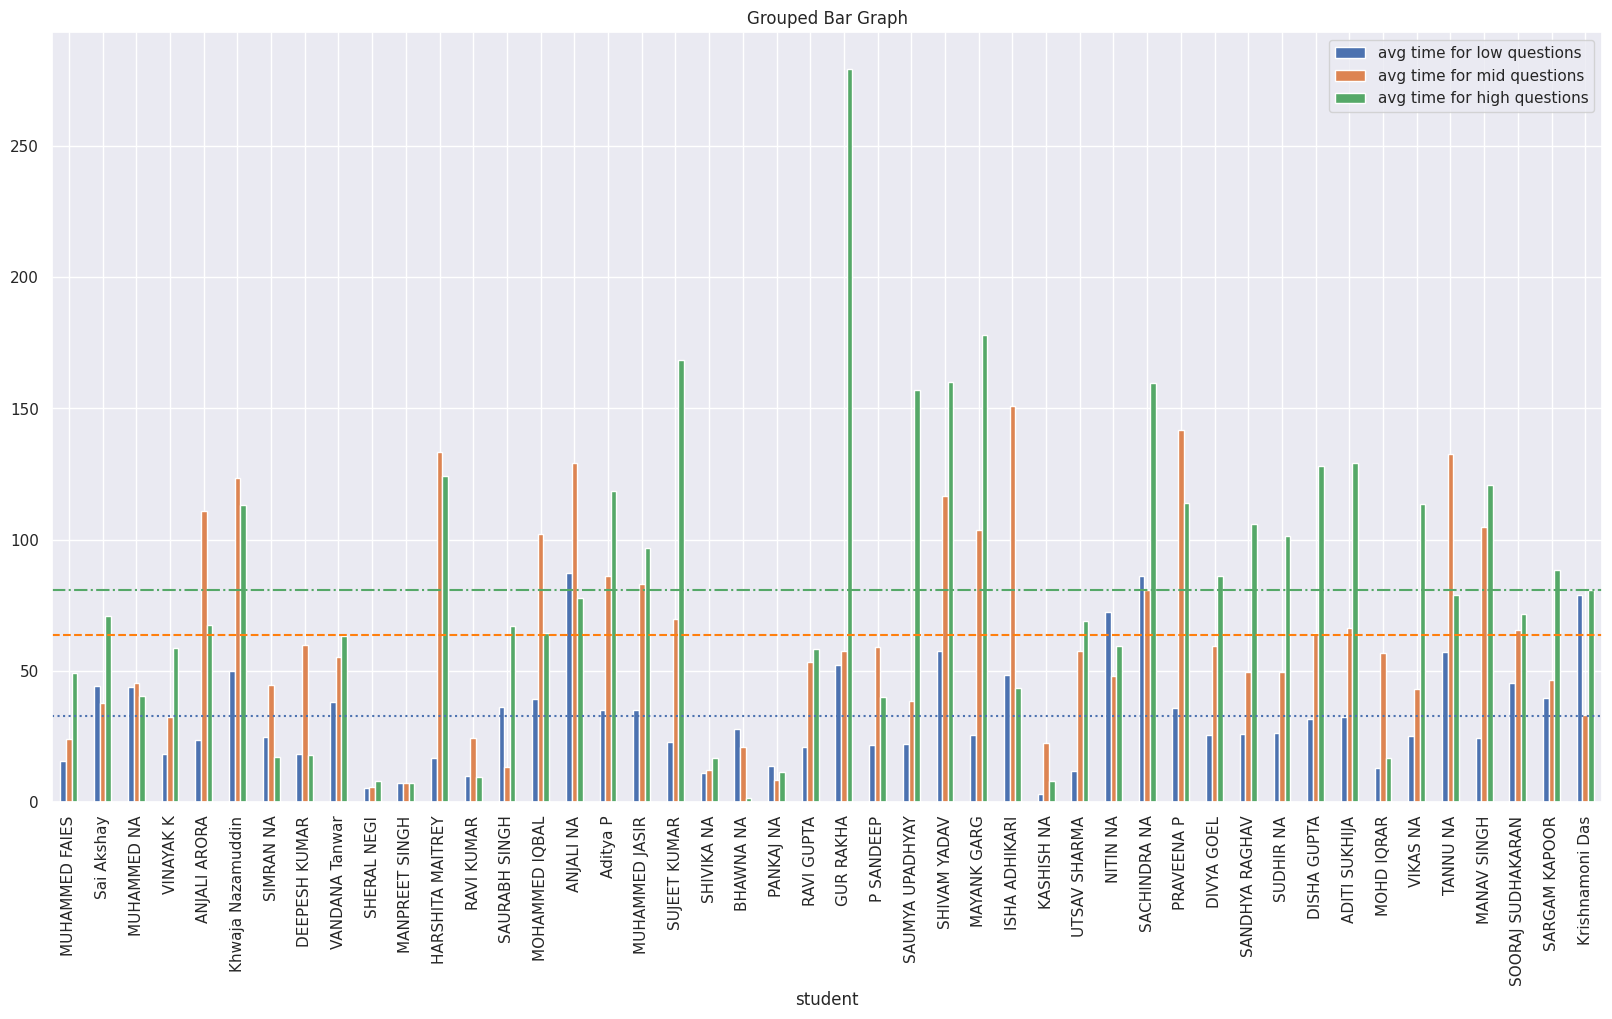

In [23]:
#plot grouped bar chart

df1.plot(x='student',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph')
plt.axhline(y = 32.83540372670808, color = 'b', linestyle = 'dotted')
plt.axhline(y = 63.80869565217392, color = 'tab:orange', linestyle = 'dashed')
plt.axhline(y = 80.8695652173913, color = 'g', linestyle = 'dashdot')

**Even for the smartest student (unless he/she already knows of the question), a hard question should in theory take more time than an easy question.**

**If students stray from that 'slope', for eg answering all questions in an avg time of 4-6 seconds, he/she can be flagged.**

hence, the students like 'Pankaj Na', 'Manpreet Singh', 'Kashish Na' (students with especially low resp times) can be flagged. If we add scores to this we can decipher if they're guessers/cheaters/extremely talented individuals.